<a href="https://colab.research.google.com/github/LucasParreirasDS/AwariDS/blob/main/EDA/%5BAWARI_DS_07_03%5D_Pr%C3%A1tica_Tratamento_Estat%C3%ADstico_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

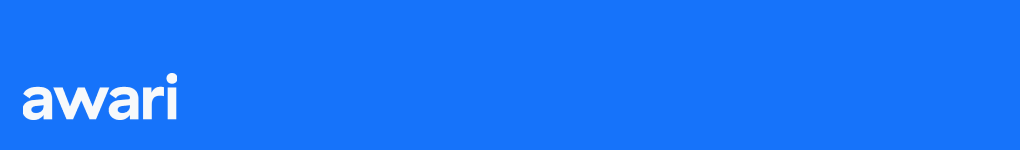

Prática da **Aula 07: Estatística Descritiva I**, do curso de **Data Science** da **[Awari](https://awari.com.br/)**. Para utilizá-la, vá no menu "Arquivo" e, em seguida, na opção "Salvar uma cópia no Drive". Isto criará uma cópia deste notebook em uma pasta chamada "Colab Notebooks", no seu Google Drive pessoal. Use a cópia para criar novas células de código ou executar as células desta prática.

---

# **Tratamento de Dados**

## **Objetivo**

Nesta prática, vamos entender como tratar dados ausentes ou que podem gerar problemas nas bases de dados que usamos em análises.

Isto é extremamente comum em bases de dados do mundo real, principalmente em dados alimentados manualmente por meio de formulários, cadastros etc. Pense, por exemplo, em cadastros preenchidos por diversos vendedores de uma multinacional ou por clientes de um grande aplicativo.

Antes de entrarmos no código, porém, vamos dar uma olhada em dois tipos de valores usados para representar dados ausentes.


### **`NaN (Not a Number)`**

`NaN` significa *Not A Number* (Não é um Número). É uma representação comum de dados ausentes. É um valor especial de ponto flutuante e não pode ser convertido em nenhum outro tipo que não seja float. Mesmo que não saibamos o que é cada `NaN`, nem todo `NaN` é igual.

Vamos imaginar que, em vez de valores `NaN`, estamos olhando para um grupo de pessoas que não conhecemos. Pessoas desconhecidas podem ser vistas como iguais para nós, o que significa que as descrevemos como desconhecidas. No entanto, na realidade, isso não significa que uma pessoa desconhecida é igual a outra pessoa desconhecida.

### **`None`**

`None` e `NaN` parecem semelhantes, mas são bem diferentes. `None` é um tipo interno do Python que pode ser considerado o equivalente a *Null* (nulo).

A palavra-chave `None` é usada para definir um valor nulo ou "nenhum valor". `None` não é igual a 0, `False` ou uma string vazia. É um tipo de dados próprio (`NoneType`) e somente `None` pode ser `None`.

## **Prática**

In [1]:
import pandas as pd

In [2]:
dados = 'https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv'

df = pd.read_csv(dados)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Detecta valores ausentes
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
# Somando valores ausentes
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Conferindo a porcentagem de valores ausentes
(df.isnull().sum() / df.shape[0]) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Com isto, conseguimos identificar os valores ausentes. Agora, temos de tratá-los.

### **O que fazer com valores ausentes?**

Talvez a primeira resposta que venha à cabeça, a essa pergunta, seja: **excluir** os dados ausentes da nossa análise.

Isso pode ser problemático. Podemos perder informações significativas de diversas colunas e distorcer seriamente os resultados de nossa análise. Afinal, em estatística, o tamanho de populações ou amostras (o tamanho dos dados) importa.

Como podemos ver acima, os valores ausentes da coluna `Cabin` representam mais de 77% da base de dados. Se excluirmos todos esses registros, teremos uma perda consideraval de informação.

No entanto, temos saídas. É possível excluir tanto linhas quanto colunas inteiras com valores ausentes com o método `dropna()`, em que é preciso sinalizar se queremos eliminar linhas (axis=0) ou colunas (axis=1).

Por padrão, se você não informar o eixo, serão eliminadas todas as linhas relativas à celula contendo o valor ausente (df.dropna(axis=0)). Caso você deseje eliminar uma coluna inteira em que existam `NaN`, você deve informar explicitamente com df.dropna(axis=1).

### **Lidando com dados ausentes**

In [6]:
# Eliminando todas as entradas onde existam valores ausentes
df_clean = df.dropna(axis=0)

# Comparando o antes e o depois
print("Antes:\t{}".format(df.shape))
print("Depois:\t{}".format(df_clean.shape))

Antes:	(891, 12)
Depois:	(183, 12)


Podemos ver o quanto de perda tivemos excluindo todos os valores nulos do nosso dataset. Isso teria de grande impacto na criação de modelos e análises.

Também temos a opção também de realizar a exclusão de dados baseado somente em uma ou mais colunas, por meio do parâmetro `subset`.

In [7]:
# Eliminando todas as entradas onde existam valores ausentes em `Cabin`
df_clean = df.dropna(subset=['Cabin'], axis=0)

# Comparando o antes e o depois
print("Antes:\t{}".format(df.shape))
print("Depois:\t{}".format(df_clean.shape))

Antes:	(891, 12)
Depois:	(204, 12)


In [8]:
# Eliminando todas as entradas onde existam valores ausentes em `Embarked` e `Age`
df_clean = df.dropna(subset=['Age', 'Embarked'], axis=0)

# Comparando o antes e o depois
print("Antes:\t{}".format(df.shape))
print("Depois:\t{}".format(df_clean.shape))

Antes:	(891, 12)
Depois:	(712, 12)


### **Inserindo valores ausentes**

Essa opção costuma ser a mais ideal, pois você não tem perda de informação, uma vez que mantém os dados existentes em outras células.

Porém, com qual valor vamos preencher esses dados?

Existem diversas abordagens para responder essa pergunta. Podemos preencher com valores estatísticos com *média*, *moda*, *mediana*.
Também podemos utilizar abordagens mais avançadas como aplicar um modelo de Machine Learning para sugerir os valores corretos faltantes.

Vamos nos atentar aqui às medidas estatísticas para preenchermos os valores com moda, média e a mediana, utilizando o método `fillna()`.

#### **Substituindo dados faltantes em "Embarked" com moda**


In [9]:
# Colocando a moda em uma variável
moda = df['Embarked'].mode()[0]
moda

'S'

In [10]:
# Testando a implementação para verificar os valores nulos totais
df['Embarked'].fillna(moda).isnull().sum()

0

In [11]:
# Aplicando as alterações com o inplace
df['Embarked'].fillna(moda, inplace=True)

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

#### **Substituindo dados faltantes em "Age" com média ou mediana**

In [12]:
# Utilizando a média
media = df.Age.mean()
mediana =  df.Age.median()

print(media,'\n',mediana)

29.69911764705882 
 28.0


In [13]:
# Utilizando a mediana (melhor, por ser um valor inteiro)
df['Age'].fillna(mediana, inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

#### **Removendo a coluna `Cabin`**

Essa coluna tem valores ausentes demais para serem imputados corretamente. Em vez de realizar um `fillna()` ou um `dropna()` em todo o dataset, podemos simplesmente excluir essa coluna, pois não teremos nenhuma perda de informação relevante.

In [14]:
df.drop('Cabin', axis = 1, inplace = True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Agora nossa base está livre de valores faltantes e pronta pra uso.

Podemos salvar ela em um arquivo CSV para utilizarmos a base limpa posteriormente, se necessário.

In [15]:
df.to_csv('titanic.csv', index=False)

---

Notebook utilizado para fins educacionais da **Awari**.

**© AWARI. Todos os direitos reservados.**